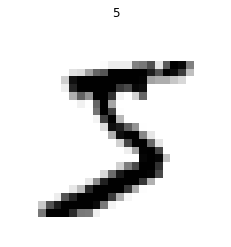

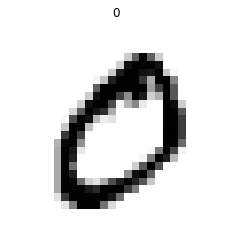

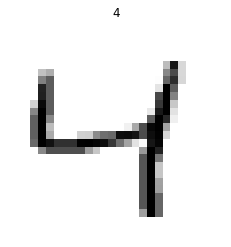

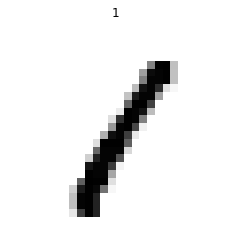

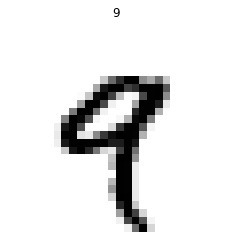

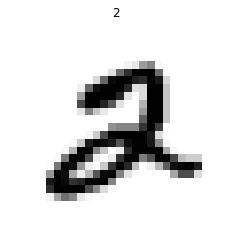

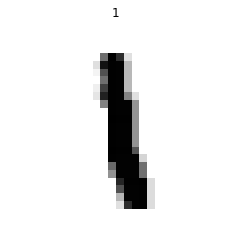

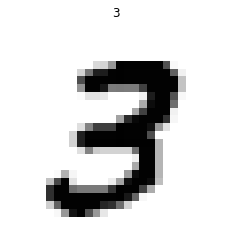

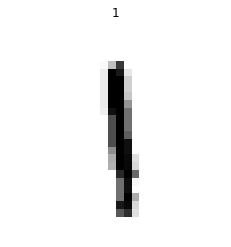

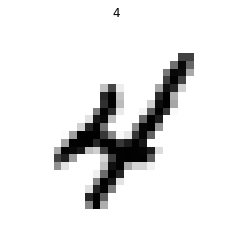

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 28)        22428     
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 28)        112       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 28)        19628     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 28)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 28)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import keras 
from keras.datasets import mnist

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization

# Get the data and preprocess it

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape , y_train.shape , X_test.shape , y_test.shape

def plot_input_img(i):
    plt.imshow(X_train[i], cmap='binary')
    plt.title(y_train[i])
    plt.axis('off')
    plt.show()

for i in range(10):
    plot_input_img(i)

# Preprocess images 
# Normalizing image to [0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255   

# Reshape / expand the dimesnsions of images to (28,28,1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# convert classes to one hot vectors
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

model=Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu'))

model.add(Conv2D(28,(5,5),padding='same', activation = 'relu',input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(28,(5,5),  activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,(5,5),padding='same',input_shape=X_train.shape[1:], activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(5,5),  activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512),  )
# model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(10))
# model.add(Activation('softmax'))


model.summary()

model.compile(optimizer = 'adam', loss = "mse", metrics = ['accuracy'])

# Callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

#EarlyStopping 
es = EarlyStopping(monitor = 'accuracy', min_delta = 0.01, patience = 5, verbose =1, mode= 'max')

# Model checkpoint
mc = ModelCheckpoint("./bestmodel.h5", monitor= 'accuracy',verbose =1, save_best_only = True, mode= 'max')

cb = [es, mc]

# Model Training
his = model.fit(X_train, y_train, epochs=50, validation_split = 0.3,  callbacks = cb)

model_S = keras.models.load_model("./bestModel.h5")

score = model_S.evaluate(X_test, y_test)
print(f"the model accuracy is {score[1]}")

